# **Class Assignment: Ordinary Least Squares (20 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>

The goal of this assignment is to code aspects of ordinary least squares regression by hand (in R).

1. Load the dataset of from this [link](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/StudentsPerformance.csv).

2. Show the first few lines using the `head()` function to ensure the data was loaded correctly.

In [4]:
#1
data = read.csv('https://raw.githubusercontent.com/khasenst/datasets_teaching/main/StudentsPerformance.csv')
#2
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


<br>


---



####<font color=red>Task 2</font>

We are interested in the relationship between math scores and reading scores of a standardized exam.

***We must always plot our data before running a regression analysis!***

1. Plot a scatterplot with reading scores on the x-axis and math scores on the y-axis. Be sure to label your plots. An example syntax is
```
plot(x, y,
     xlab = "Reading Scores",
     ylab = "Math Scores",
     main = "Plot of Math Scores vs Reading Scores")
```

2. In complete sentences, describe the visual relationship you observe between math and reading scores from the scatterplot.
    * Is the relationship a line? a quadratic?
    * Are the values skewed?
    * etc.

2. Plot the histogram of math scores and describe your observations in complete sentences.




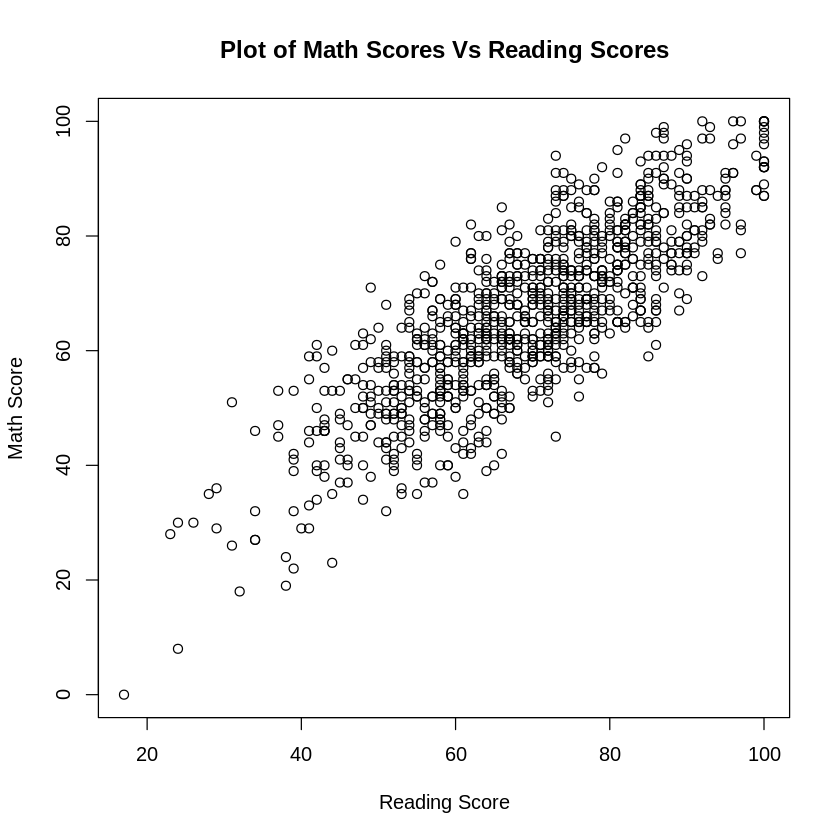

In [5]:
#1
x = data$reading.score
xlab = "Reading Score"
y= data$math.score
ylab = 'Math Score'
plot(x,y, xlab = xlab, ylab = ylab, main = "Plot of Math Scores Vs Reading Scores")

#2
The data seems to form a line meaning there is probably a linear relationship between the two scores. The values may be skewed a bit to the left since the average of both seems to lay in the 60s or 70s.

## 3


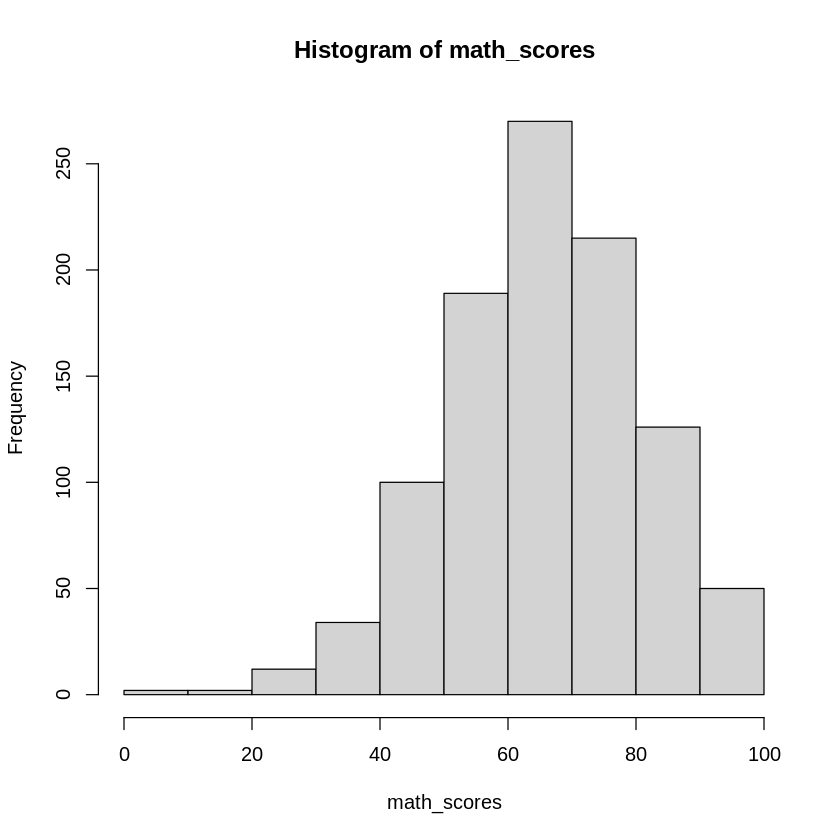

In [7]:
math_scores = data$math.score
hist(math_scores)

the math scores seem to be normally distributed but are also skewed left, with a mean between 60 and 70

<br>


---



####<font color=red>Task 3</font>

1. Calculate the mean of reading scores and store as `xbar`.

2. Calculate the mean of math scores and store as `ybar`.

3. Calculate the estimate for the slope and store as `beta1hat`
<center>$\hat{\beta_1} = \frac{\sum_i (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_i (X_i - \bar{X})^2}$</center>

4. Calculate the estimate for the intercept and store as `beta0hat`
<center>$ \hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X} $</center>

5. Fit a simple linear regression model using the built-in R function `lm()` and verify you have calculated the correct intercept and slope using the following code.
```
fit <- lm(math.score ~ reading.score, data = dat)
summary(fit)
```

6. In a text cell, write down you final linear regression model using the intercept and slope estimates you calculated.



In [15]:
#1
xbar = mean(data$reading.score)
xbar

[1] 69.169

In [16]:
#2
ybar = mean(data$math.score)
ybar

[1] 66.089

In [17]:
#3
num = sum((data$reading.score - xbar) * (data$math.score - ybar))
denom = sum((data$reading.score - xbar)^2)
beta1hat = num / denom
beta1hat

[1] 0.8491002

In [18]:
#4
beta0hat = ybar - beta1hat*xbar
beta0hat

[1] 7.357588

In [20]:
#5
fit = lm(math.score ~ reading.score, data = data)
summary(fit)


Call:
lm(formula = math.score ~ reading.score, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3419  -6.3419  -0.0221   6.2713  24.6581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.35759    1.33818   5.498 4.87e-08 ***
reading.score  0.84910    0.01893  44.855  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.736 on 998 degrees of freedom
Multiple R-squared:  0.6684,	Adjusted R-squared:  0.6681 
F-statistic:  2012 on 1 and 998 DF,  p-value: < 2.2e-16


#6
$Y_{i} = 7.35759 + .84910X_{i}$

<br>

---

<br>






####<font color=red>Task 4</font>

1. Calculate the fitted values of the regression and store as the variable `yhat`
<center>$\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X$</center>

2. Compare your `yhat` values to those reported by the `lm()` function using the code below. The output should be 0 or very close to zero.
```
sum((yhat - fit$fitted.values)^2)
```

3. Calculate the residuals of the regression model and store as the variable `resid`
<center> $ \hat{e_i} = Y_i - \hat{Y_i} $ </center>

4. Compare your `resid` values to those reported by the `lm()` function using the code below. The output should be 0 or very close to zero.
```
sum((resid - fit$residuals)^2)
```

5. Plot a histogram of the residuals and provide your observations in complete sentences. Do the residuals appear to be symmetric? Skewed? Normally distributed?

In [30]:
#1
yhat = beta0hat + beta1hat*x

In [31]:
#2
sum((yhat - fit$fitted.values)^2)

[1] 3.352343e-26

In [37]:
#3
resid = data$math.score - yhat

In [33]:
#4
sum((resid - fit$residuals)^2)

[1] 2.968062e-26

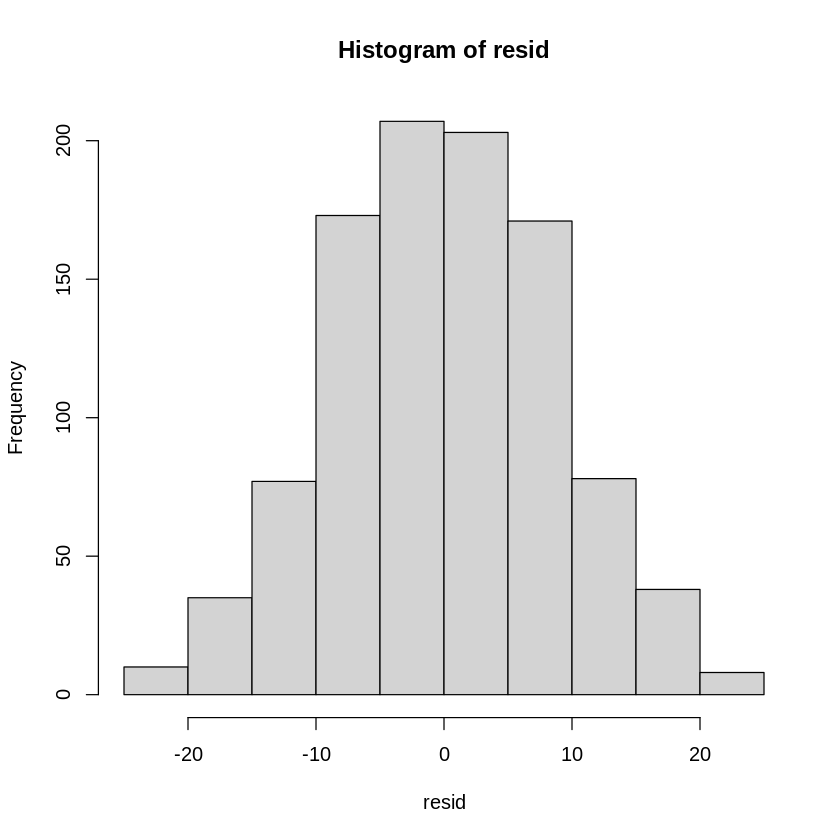

In [34]:
#5
hist(resid)

my histogram seems very beautiful symmetric (not skewed) and also normally distributed. This makes sense because we said the estimate of the error term follows a probability distribution.

<br>

---

<br>






####<font color=red>Task 5</font>

1. Calculate the estimate ($s^2$) for the variance of the error term ($\sigma^2$) and store as `s2`
<center> $s^2 = \frac{1}{n-2} \sum_i \left(Y_i - \hat{Y_i}\right)^2$ </center>

2. Calculate the residual standard error ($s$).

2. Compare your answer to the value reported by the regression summary (`summary(fit)`) under `residual standard error`

In [42]:
#1
num = sum((resid)^2)
n = length(data$math.score)
denom = n-2
s2 = num / denom
s2

[1] 76.30913

In [43]:
#2
s = sqrt(s2)
s

[1] 8.73551

In [44]:
#3
fit = lm(math.score ~ reading.score, data = data)
summary(fit)


Call:
lm(formula = math.score ~ reading.score, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3419  -6.3419  -0.0221   6.2713  24.6581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.35759    1.33818   5.498 4.87e-08 ***
reading.score  0.84910    0.01893  44.855  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.736 on 998 degrees of freedom
Multiple R-squared:  0.6684,	Adjusted R-squared:  0.6681 
F-statistic:  2012 on 1 and 998 DF,  p-value: < 2.2e-16


<br>

---

<br>






####<font color=red>Task 6</font>

1. Re-plot the scatterplot from Task 2 and overlay the fitted line using the following command
```
plot(x, y,
     xlab = "Reading Scores",
     ylab = "Math Scores",
     main = "Plot of Math Scores vs Reading Scores")
abline(fit)
```

  Does the regression appear to fit the data well? Explain your answer in complete sentences.

2. What is the interpretation of the intercept in the context of the standardized test application? Does this make sense to you? Explain your answer in complete sentences.

3. What is the interpretation of the slope in the context of the standardized test application? Explain your answer in complete sentences.

4. Is the slope greater or less than 1? Can you speculate as to why the slope is greater or less than 1? Explain your answer in complete sentences.



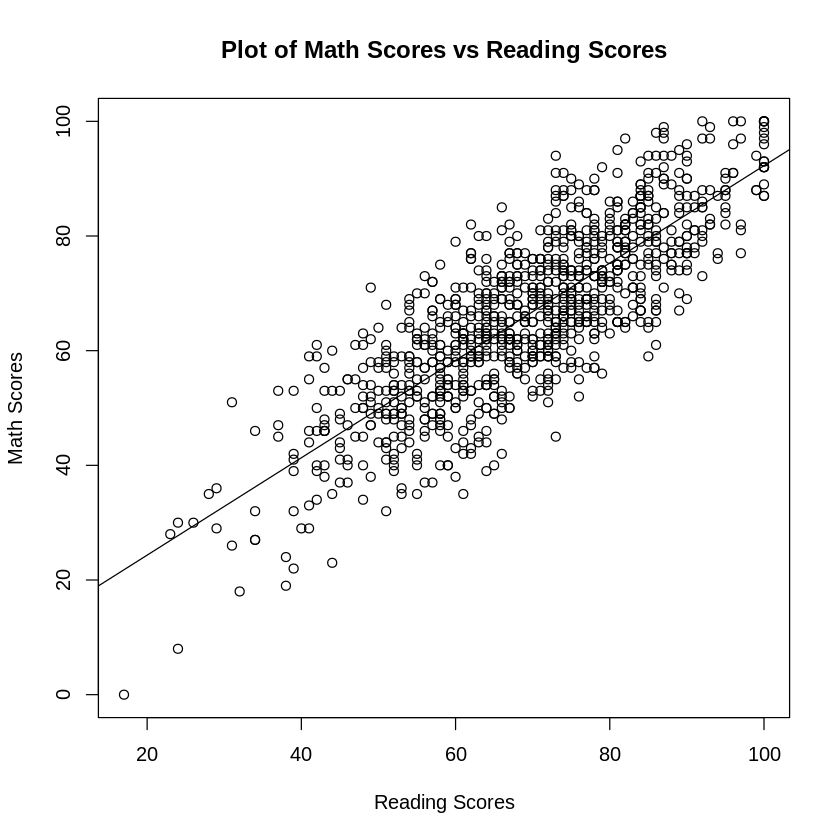

In [45]:
#1
plot(x, y,xlab = "Reading Scores",ylab = "Math Scores",main = "Plot of Math Scores vs Reading Scores")
abline(fit)

#2
#What is the interpretation of the intercept in the context of the standardized test application? Does this make sense to you? Explain your answer in complete sentences.
  -This means that for students who scores a 0 on the reading test, they scored a zero on the math test. Which could happen if they just did not take the reading test but took the math and did bad. This is a possiblity and does make senese in some cases but if we assume everyone took both exams, then we would probably expect the intercept to be (0,0)


#3
#What is the interpretation of the slope in the context of the standardized test application? Explain your answer in complete sentences.
- for each additional score earned on the reading score, the math score increases by .849 points.

#4
#Is the slope greater or less than 1? Can you speculate as to why the slope is greater or less than 1? Explain your answer in complete sentences.
-the slope is less than 1. It makes sense that the slope isnt exactly 1 because students may not have the same level of reading as they do math. Now in this context, a slope less than 1 means the students are better at reading then they are math, which is fair and realistic, depending on what type of students this was testing


<br>

---

<br>






#### **More Practice (optional but useful)**

What if we were interested in investigating the difference in standardize test scores between students on a standard vs free/reduce lunch program?

1. Run the following lines to save two dataframes - one for standard lunch and one for free/reduced lunch
```
standard <- subset(dat, lunch == "standard")
free     <- subset(dat, lunch == "free/reduced")
```

2. Using `standard`, fit a simple linear regression model using math score as the y variable and reading score as the x variable. Store the regression fit as `fit_standard`.

2. Using `free`, fit a simple linear regression model using math score as the y variable and reading score as the x variable. Store the regression fit as `fit_free`.

3. Plot the regressions on a scatterplot.
```
plot(standard$reading.score, standard$math.score,
     xlab = "Reading Scores",
     ylab = "Math Scores",
     main = "Plot of Math Scores vs Reading Scores",
     pch = 1)
points(free$reading.score, free$math.score,
     xlab = "Reading Scores",
     ylab = "Math Scores",
     main = "Plot of Math Scores vs Reading Scores",
     pch = 1, col = "red")
legend("topleft", c("standard", "free"), col = c("black", "red"), pch = 16)
abline(fit_standard, lwd = 2)
abline(fit_free, col = "red", lwd = 2)
```
What do you observe? Do they have different intercepts? Do they have different slopes?

4. Show the summaries for both regressions. Do the estimates agree with the observations from your plot?

  Later we will learn to formally test for any differences in intercepts or slopes!